# Definición de Proyecto GRD

## 1. Integrantes del grupo
- Estudiante 1: Luis Nicolas Pino
- Estudiante 2: Marcial Ibáñez


## 2. Título tentativo del proyecto
Análisis de la distribución de recursos hospitalarios en el sistema de salud pública basado en GRD Chile 2024


## 3. Declaración del problema desde el usuario
Los servicios de salud pública deben mantener una administración eficiente de sus recursos para garantizar una atención continua y de calidad a la población chilena. 
Para lograr dicha eficiencia, es fundamental realizar análisis constantes sobre las características de la población del país y su experiencia con el sistema de salud pública.

La falta de análisis continuos impide una asignación de recursos contingente a las necesidades actuales, afectando la calidad y cobertura del sistema de salud pública en Chile.

## 4. Pregunta principal de investigación
¿Cómo afectan las caracteristicas fisiologicas de un paciente y el contexto de su condicion en el costo hospitalario producido por estos en el Servicio de Salud Público?

## 5. Preguntas secundarias (mínimo 2)
- Pregunta secundaria 1: ¿Cómo se ve afectado el peso hospitalario por los días de estancia?
- Pregunta secundaria 2: ¿Cuáles son los rangos etarios con mayor y menor costo asociado?
- Pregunta secundaria 3: ¿Cómo se relaciona el tipo de ingreso con la edad del paciente, y de qué manera afectan al costo hospitalario?

## 6. Variables principales y justificación de selección
- Variable 1: Peso - Justificación: El proyecto se enfoca en estudiar su comportamiento y el efecto en las demás variables
- Variable 2: Días de estancia - Justificación: Variable para estudiar el efecto de la duración de la estancia en los recursos hospitalarios.
- Variable 3: Edad  - Justificación: variable para clasificar a la población en grupos etarios y estudiar el comportamiento de cada grupo.
- (Opcional) Variable 4: Sexo - Justificación: variable para clasificar biologicamente a los pacientes y analizar comportamientos.
- (Opcional) Variable 5: Tipo Ingreso - Justificación: variable para observar el efecto del contexto del ingreso en el costo y cómo este afecta a los demás.

## 7. Metodología estadística propuesta

- Método 1: Estadística Descriptiva- Propósito: Conocer el comportamiento de las variables individualmente.
- Método 2: Estadística multivariada- Propósito: Relacionar el comportamiento de varias variables (Peso, Tipo Ingreso, Edad) y cómo se influyen entre ellas, esto para poder justificar mejor las respuestas a nuestras preguntas, además de proveer un análisis más completo.
- Método 3: Estadística inferencial- Propósito: Sacar conclusiones y predicciones respecto a los datos.

-Método 1: test ANOVA (Análisis de Varianza) - Comparar las medias de Peso a través de Grupos Etarios.

-Método 2: Regresión Lineal - Sacar predicciones respecto a la Peso y los días de estancia.

-Método 3: Correlación -  Verificar el tipo de relación entre las variables propuestas y si esta es positiva, negativa o nula.

## 8. Potencial impacto y aplicación práctica
Los resultados obtenidos de esta investigación influyen en la toma de decisiones de los administradores de servicios de salud, ayudará a enfocar los esfuerzos en los grupos que más lo requieran.

## 9. Supuestos estadísticos necesarios
- Supuesto 1: Relación entre edad (grupo etario) y peso - Forma de validación: Gráficos de correlación entre ambas variables y el levantamiento de estadísticos que lo demuestren
- Supuesto 2:  - El tipo de ingreso, asi como el sexo, son factores que influyen el peso
- Forma de validación: Crear gráficos que nos permitan concluir algún tipo de relación.

## 10. Limitaciones del estudio (sesgos)
Anticipe posibles limitaciones que podrían afectar la validez o generalización de sus resultados y cómo planean mitigarlas.

- Limitación 1: 	Sesgo Etario, puede haber un posible sesgo en la densidad y distribución de población en los rangos etarios, lo cual puede afectar el análisis y la regresión lineal.
-Estrategia de mitigación: observar lógicamente las distribuciones, y ver si se levantan patrones con o sin sentido del mundo real.

- Limitación 2: Sesgo de Sexo, las caracteristicas biologicas entre ambos grupos generan diferencia en la asignacion de recursos, debido a las distintas razones por las cuales ingresan. 
-Estrategia de mitigación: se revisará la distribución y se harán análisis separados para cada grupo. 

## 11. Cronograma detallado del proyecto
Defina claramente las actividades que realizarán en cada bloque de semanas según el calendario del curso.
- Semanas 4-5: Limpieza de datos y extracción de los datos útiles para el estudio
- Semanas 6-7: Análisis de variables individualmente por servicio de salud
- Semanas 8-9: Analisis multivariable e inicio de analisis inferencial
- Semanas 10-11: Análisis inferencial para predicciones
- Semana 12 (preparación final): Conclusiones a partir de la información obtenida

## Ideas
Agregar intervalos de confianza  
Regresion lineal para tratar de predecir resultados  
Regresion lineal para control de calidad (predecir resultado, comparar con original y ver que tan bien se aplicó el tratamiento)  
 

In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
#import statsmodels.api as sm
#from scipy.stats import norm, gamma, expon, lognorm, chi2, kstest, anderson
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

warnings.filterwarnings('ignore')

# Configuración de visualización
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 12
sns.set_palette("deep")

# Opcional: semilla para reproducibilidad
np.random.seed(42)

In [96]:
df = pd.read_csv("data\GRD_2023_muestra_cancer_UCV_limpio.csv")

In [97]:
df = df[~df.isin(["DESCONOCIDO"]).any(axis=1)]
df = df[df["DIAS_ESTANCIA"] < 100]

In [98]:
bins = [0, 10, 18, 40, 65, float("inf")]
labels = ["0-9", "10-18", "19-40", "41-65", "66+"]

df["rango_etario"] = pd.cut(df["EDAD"], bins = bins, labels=labels, right=True, include_lowest = True)

In [99]:
df = df[df["DIAS_ESTANCIA"] < 60]

In [100]:
df

,COD_HOSPITAL,CIP_ENCRIPTADO,SEXO,FECHA_NACIMIENTO,SERVICIO_SALUD,TIPO_INGRESO,FECHA_INGRESO,FECHAALTA,TIPOALTA,DIAGNOSTICO1,IR_29301_COD_GRD,IR_29301_PESO,IR_29301_SEVERIDAD,IR_29301_MORTALIDAD,TIPO_FECHA_NACIMIENTO,TIPO_FECHA_INGRESO,TIPO_FECHAALTA,EDAD,DIAS_ESTANCIA,rango_etario
0,122100,72196813,HOMBRE,1980-04-13,VALDIVIA,URGENCIA,2023-03-12,2023-03-14,DOMICILIO,K35.3,064161,0.7094,1.0,1.0,YMD,DMY,DMY,43.0,2,41-65
2,114101,97627974,HOMBRE,2020-07-30,METROPOLITANO SURORIENTE,URGENCIA,2023-06-07,2023-06-08,HOSPITALIZACIÓN DOMICILIARIA,J12.1,044161,0.4084,1.0,1.0,YMD,DMY,DMY,3.0,1,0-9
3,106103,67770674,MUJER,1978-11-14,VALPARAISO SAN ANTONIO,PROGRAMADA,2023-05-25,2023-05-26,DOMICILIO,N39.3,131301,0.6406,1.0,1.0,YMD,DMY,DMY,45.0,1,41-65
4,106103,100390800,MUJER,2023-12-20,VALPARAISO SAN ANTONIO,URGENCIA,2023-12-28,2023-12-30,DOMICILIO,R17,074131,0.5346,1.0,1.0,YMD,DMY,DMY,0.0,2,0-9
5,108100,72858368,MUJER,1964-12-20,ACONCAGUA,PROGRAMADA,2023-04-24,2023-04-24,DOMICILIO,M54.99,083110,0.1032,0.0,0.0,YMD,DMY,DMY,58.0,0,41-65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039582,105102,78111817,MUJER,1995-12-06,COQUIMBO,OBSTETRICA,2023-01-01,2023-01-04,DOMICILIO,O03.1,131111,0.5227,1.0,1.0,YMD,DMY,DMY,27.0,3,19-40
1039583,118100,76593606,MUJER,1991-04-26,CONCEPCIÓN,PROGRAMADA,2023-06-14,2023-06-14,DOMICILIO,N87.1,132340,0.1761,0.0,0.0,YMD,DMY,DMY,32.0,0,19-40
1039584,115100,100360940,HOMBRE,2015-01-08,LIBERTADOR B. O HIGGINS,URGENCIA,2023-11-29,2023-12-01,DOMICILIO,K35.8,061131,0.7398,1.0,1.0,YMD,DMY,DMY,9.0,2,0-9
1039585,123100,78557002,HOMBRE,2014-01-07,OSORNO,PROGRAMADA,2023-03-28,2023-03-28,DOMICILIO,J45.0,044181,0.3452,1.0,1.0,YMD,DMY,DMY,9.0,0,0-9


In [101]:
def medidas_tendencia(serie): 
    print("ESTADISTICOS DE", serie.name)

    print("\nMEDIDAS DE TENDENCIA CENTRAL")
    print("Media:", serie.mean())
    print("Mediana:",serie.median())
    print("Moda:",serie.mode()[0])

    print("\nMEDIDAS DE DISPERSION")
    print("Desviacion Estandar:",serie.std())
    print("Rango:", serie.max()-serie.min())
    print("Percentiles 25%:", serie.quantile(0.25))
    print("Percentiles 50%:", serie.quantile(0.5))
    print("Percentiles 75%:", serie.quantile(0.75))
    IQR = serie.quantile(0.75) - serie.quantile(0.25)

    # Definir límites para Atipicos
    limite_inferior = serie.quantile(0.25) - 1.5 * IQR
    limite_superior = serie.quantile(0.75) + 1.5 * IQR
    print(f"\nLimites Atipicos: [{limite_inferior}, {limite_superior}]")


    #INTERVALO DE CONFIANZA
    conf = 0.95 #la confianza a usar
    n = len(serie) #tamaño de la muestra
    media=serie.mean()
    #intervalo de confianza
    e= stats.t.interval(confidence=conf, df=n-1, loc=media, scale=stats.sem(serie)) #sem = error medio
    print("\nIntervalos de Confianza:",e)

medidas_tendencia(df["IR_29301_PESO"])

ESTADISTICOS DE IR_29301_PESO

MEDIDAS DE TENDENCIA CENTRAL
Media: 0.9312212012009093
Mediana: 0.6915
Moda: 0.4384

MEDIDAS DE DISPERSION
Desviacion Estandar: 0.9740493340580156
Rango: 20.6461
Percentiles 25%: 0.4683
Percentiles 50%: 0.6915
Percentiles 75%: 1.0328

Limites Atipicos: [-0.37845, 1.87955]

Intervalos de Confianza: (np.float64(0.9293393926091356), np.float64(0.9331030097926831))


Tamaño del Dataset: 1029220


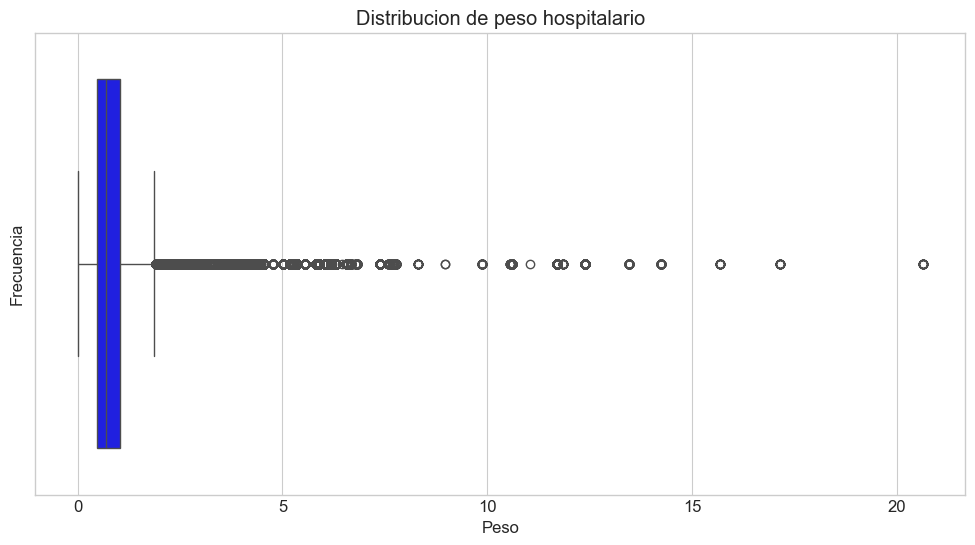

Límite inferior: -0.38
Límite superior: 1.88
Número de outliers: 72040

Tamaño del Dataset: 957180


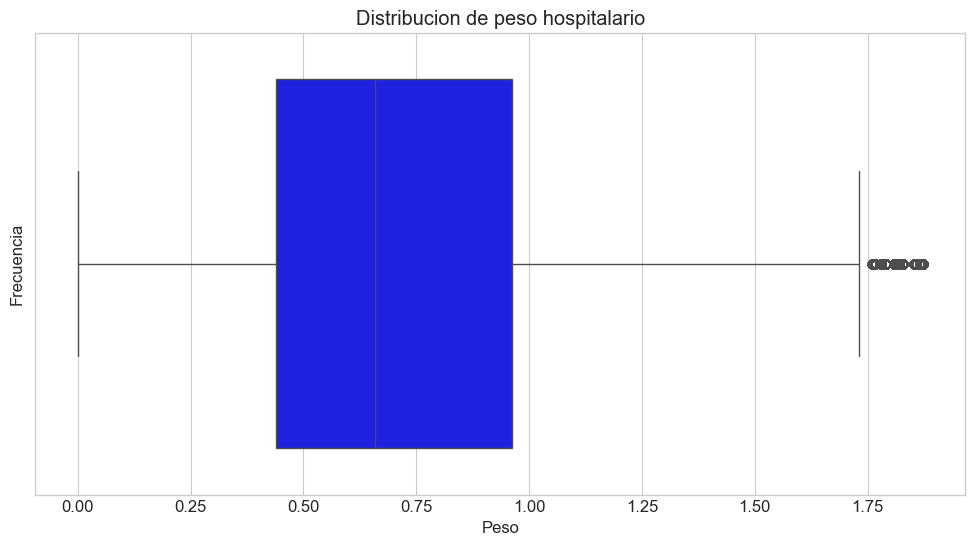

In [102]:
def cortar_outliers(df, columna):
    q1 = df[columna].quantile(0.25)
    q3 = df[columna].quantile(0.75)
    iqr = q3 - q1
    limite_inferior = q1 - 1.5 * iqr
    limite_superior = q3 + 1.5 * iqr

    print(f"Límite inferior: {limite_inferior:.2f}")
    print(f"Límite superior: {limite_superior:.2f}")

    # Identificación de outliers
    outliers = df[(df[columna] < limite_inferior) | (df[columna] > limite_superior)]
    print(f"Número de outliers: {len(outliers)}")

    # DataFrame sin outliers
    df_sin_outliers = df[(df[columna] >= limite_inferior) & (df[columna] <= limite_superior)]
    return df_sin_outliers

print("Tamaño del Dataset:", len(df))
plt.figure(figsize=(12, 6))
sns.boxplot(x = df['IR_29301_PESO'], color='blue')
plt.title('Distribucion de peso hospitalario')
plt.xlabel('Peso')
plt.ylabel('Frecuencia')
plt.show()

df2 = cortar_outliers(df,'IR_29301_PESO')

print("\nTamaño del Dataset:", len(df2))
plt.figure(figsize=(12, 6))
sns.boxplot(x = df2['IR_29301_PESO'], color='blue')
plt.title('Distribucion de peso hospitalario')
plt.xlabel('Peso')
plt.ylabel('Frecuencia')
plt.show()

### Guardamos solo las columnas a usar

In [103]:
df2 = df2[["IR_29301_PESO","SEXO", "EDAD", "DIAS_ESTANCIA", "TIPO_INGRESO","rango_etario"]].reset_index(drop=True)
df2.dropna(inplace=True)
df2

,IR_29301_PESO,SEXO,EDAD,DIAS_ESTANCIA,TIPO_INGRESO,rango_etario
0,0.7094,HOMBRE,43.0,2,URGENCIA,41-65
1,0.4084,HOMBRE,3.0,1,URGENCIA,0-9
2,0.6406,MUJER,45.0,1,PROGRAMADA,41-65
3,0.5346,MUJER,0.0,2,URGENCIA,0-9
4,0.1032,MUJER,58.0,0,PROGRAMADA,41-65
...,...,...,...,...,...,...
957175,0.5227,MUJER,27.0,3,OBSTETRICA,19-40
957176,0.1761,MUJER,32.0,0,PROGRAMADA,19-40
957177,0.7398,HOMBRE,9.0,2,URGENCIA,0-9
957178,0.3452,HOMBRE,9.0,0,PROGRAMADA,0-9


## Analisis por variable

### Sexo

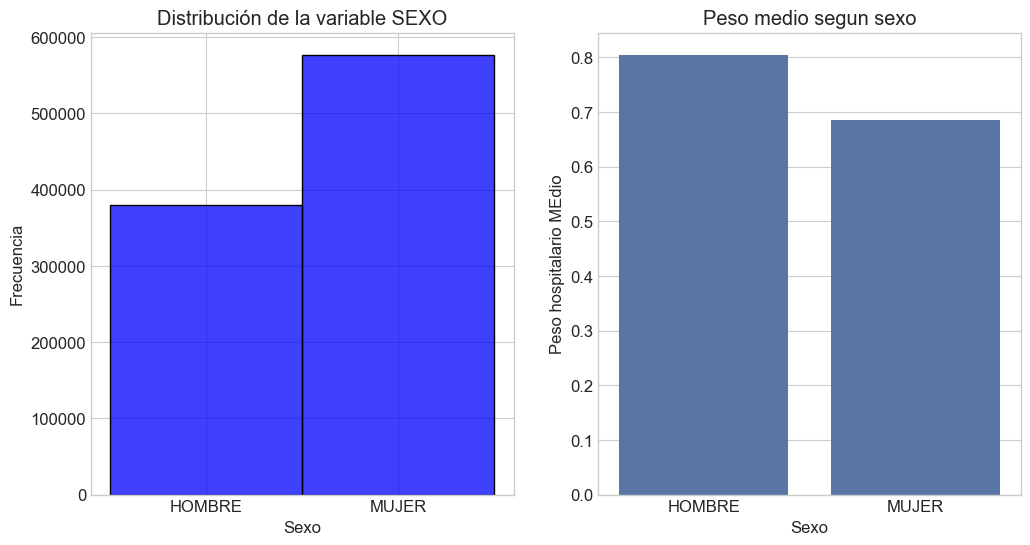

In [104]:
#Pregunta secundaria 1 ¿Cómo se ve afectado el peso hospitalario por los días de estancia?
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(df2['SEXO'], bins=50, color='blue')
plt.title('Distribución de la variable SEXO')
plt.xlabel('Sexo')
plt.ylabel('Frecuencia')

plt.subplot(1, 2, 2)
df2_grouped = df2.groupby('SEXO')['IR_29301_PESO'].mean().reset_index()

# Graficar
sns.barplot(x = df2_grouped['SEXO'], y = df2_grouped['IR_29301_PESO'])
plt.title("Peso medio segun sexo")
plt.xlabel("Sexo")
plt.ylabel("Peso hospitalario MEdio")
plt.show()

Podemos observar que a pesar de que los hombres menos registros en el dataset, estos tienen un peso medio mas alto que las mujeres

### Edad y rango etario

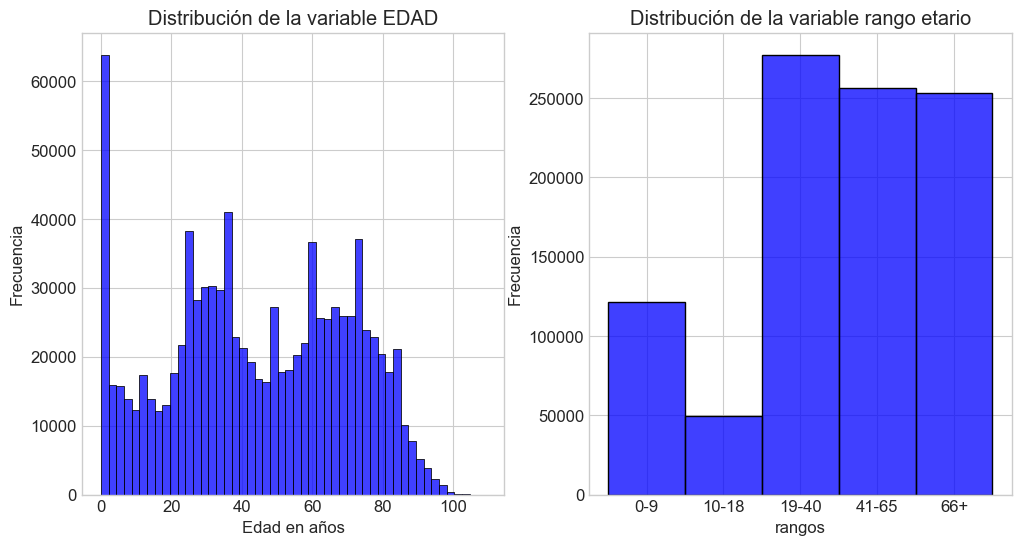

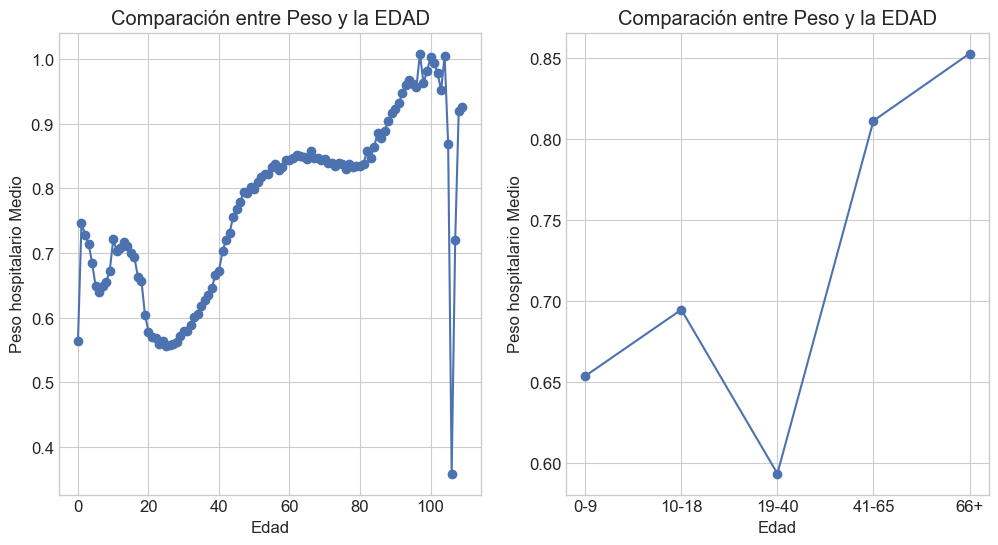

In [105]:
#Pregunta secundaria 2: ¿Cuáles son los rangos etarios con mayor y menor costo asociado?
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(df2['EDAD'], bins=50, color='blue')
plt.title('Distribución de la variable EDAD')
plt.xlabel('Edad en años')
plt.ylabel('Frecuencia')

plt.subplot(1, 2, 2)
sns.histplot(df2['rango_etario'], color='blue')
plt.title('Distribución de la variable rango etario')
plt.xlabel("rangos")
plt.ylabel('Frecuencia')

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
df2_grouped = df2.groupby('EDAD')['IR_29301_PESO'].mean().reset_index()

# Graficar
plt.plot(df2_grouped['EDAD'], df2_grouped['IR_29301_PESO'], marker='o', linestyle='-')
plt.title("Comparación entre Peso y la EDAD")
plt.xlabel("Edad")
plt.ylabel("Peso hospitalario Medio")
plt.grid(True)

plt.subplot(1, 2, 2)
df2_grouped = df2.groupby('rango_etario')['IR_29301_PESO'].mean().reset_index()

# Graficar
plt.plot(df2_grouped['rango_etario'], df2_grouped['IR_29301_PESO'], marker='o', linestyle='-')
plt.title("Comparación entre Peso y la EDAD")
plt.xlabel("Edad")
plt.ylabel("Peso hospitalario Medio")
plt.grid(True)
plt.show()

### Dias de estancia

In [106]:
bins = [0, 3, 7, 14, 30, float("inf")]
labels = ["0-3", "4-7", "8-14", "15-30", "31-60"]

df2["rango_de_estancia"] = pd.cut(df2["DIAS_ESTANCIA"], bins = bins, labels=labels, right=True, include_lowest = True)

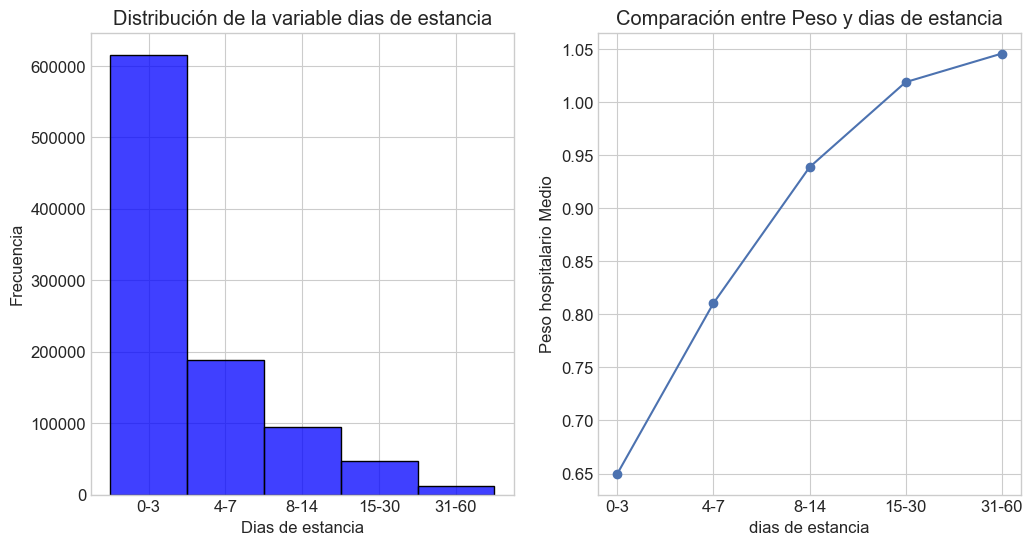

In [107]:
#Pregunta secundaria 1 ¿Cómo se ve afectado el peso hospitalario por los días de estancia?
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)

sns.histplot(df2['rango_de_estancia'], bins=50, color='blue')
plt.title('Distribución de la variable dias de estancia')
plt.xlabel('Dias de estancia')
plt.ylabel('Frecuencia')

plt.subplot(1, 2, 2)
df2_grouped = df2.groupby('rango_de_estancia')['IR_29301_PESO'].mean().reset_index()

plt.plot(df2_grouped['rango_de_estancia'], df2_grouped['IR_29301_PESO'], marker='o', linestyle='-')
plt.title("Comparación entre Peso y dias de estancia")
plt.xlabel("dias de estancia")
plt.ylabel("Peso hospitalario Medio")
plt.grid(True)

In [108]:
# estoy hay que cambiarlo, ya que la media no es representativa para ninguno de los rangos

### Tipo de ingreso

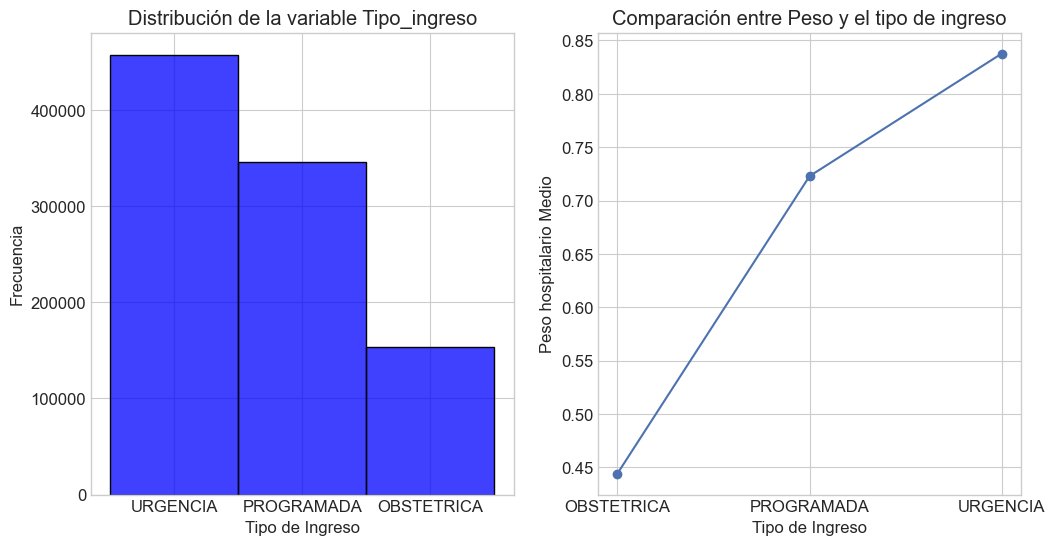

In [109]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(df2['TIPO_INGRESO'], bins=50, color='blue')
plt.title('Distribución de la variable Tipo_ingreso')
plt.xlabel("Tipo de Ingreso")
plt.ylabel('Frecuencia')

df2_grouped = df2.groupby('TIPO_INGRESO')['IR_29301_PESO'].mean().reset_index()

plt.subplot(1, 2, 2)
plt.plot(df2_grouped['TIPO_INGRESO'], df2_grouped['IR_29301_PESO'], marker='o', linestyle='-')
plt.title("Comparación entre Peso y el tipo de ingreso")
plt.xlabel("Tipo de Ingreso")
plt.ylabel("Peso hospitalario Medio")
plt.grid(True)
plt.show()

## Analisis multivariado

In [110]:
#1 - Pregunta secundaria 3: ¿Cómo se relaciona el tipo de ingreso con la edad del paciente, y de qué manera afectan al costo hospitalario?

### Tipo de ingreso y edad (y rango etario)

In [111]:
df2['tipo_ingreso_n'] = df2['TIPO_INGRESO'].map({'URGENCIA': 1, 'PROGRAMADO': 2, 'OBSTETRICA': 3}).fillna(0).astype(int)

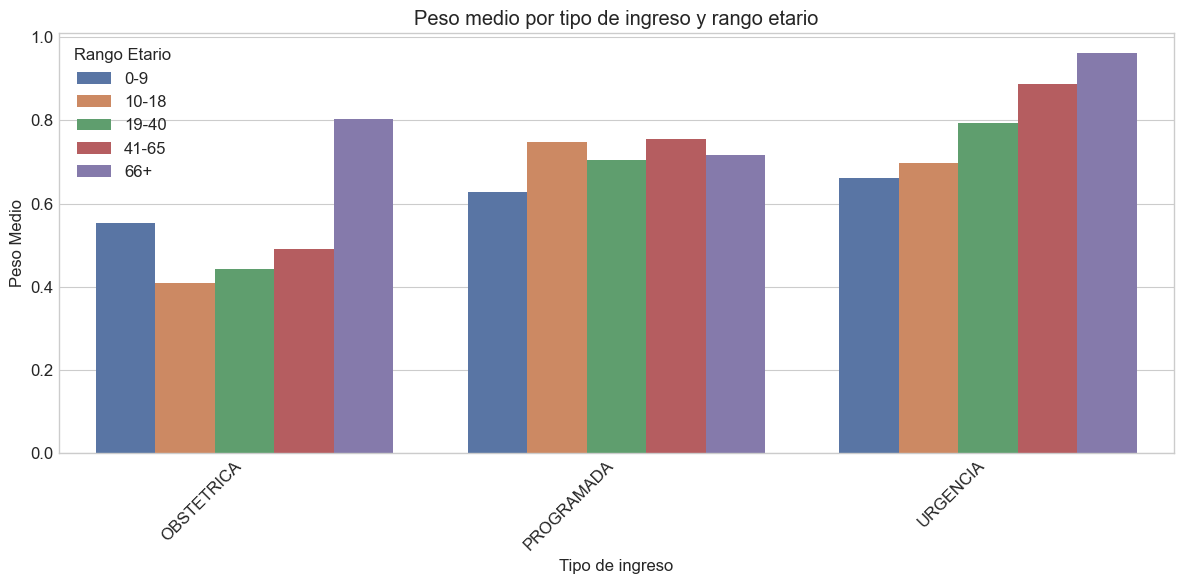

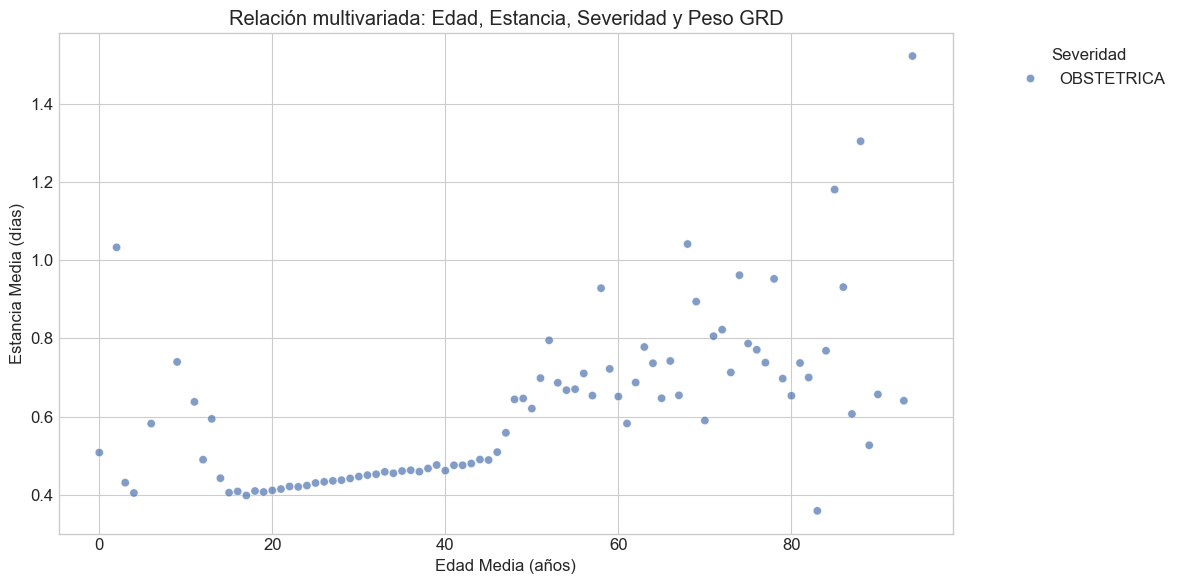

In [112]:
plt.figure(figsize=(12, 6))

df2_grouped = df2.groupby(['TIPO_INGRESO', 'rango_etario'])['IR_29301_PESO'].mean().reset_index()

sns.barplot(x='TIPO_INGRESO', y='IR_29301_PESO', hue='rango_etario', data=df2_grouped)
plt.title('Peso medio por tipo de ingreso y rango etario')
plt.xlabel('Tipo de ingreso')
plt.ylabel('Peso Medio')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Rango Etario')
plt.tight_layout()

plt.figure(figsize=(12, 6))

df2_grouped = df2.groupby(['TIPO_INGRESO', 'EDAD'])['IR_29301_PESO'].mean().reset_index()
df2_grouped_filter = df2_grouped[df2_grouped['TIPO_INGRESO'] == "OBSTETRICA"]

scatter = sns.scatterplot(data=df2_grouped_filter, x='EDAD', y='IR_29301_PESO', 
                         hue='TIPO_INGRESO', 
                         sizes=(50, 250), alpha=0.7)

plt.title('Relación multivariada: Edad, Estancia, Severidad y Peso GRD')
plt.xlabel('Edad Media (años)')
plt.ylabel('Estancia Media (días)')
plt.legend(title='Severidad', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
plt.show()

In [113]:
df2['tipo_ingreso_n'] = df2['TIPO_INGRESO'].map({'URGENCIA': 1, 'PROGRAMADA': 2, 'OBSTETRICA': 3}).fillna(0).astype(int)

In [114]:
df2['sexo_n'] = df2['SEXO'].map({'HOMBRE': 1, 'MUJER': 2}).fillna(0).astype(int)

In [115]:
df2

,IR_29301_PESO,SEXO,EDAD,DIAS_ESTANCIA,TIPO_INGRESO,rango_etario,rango_de_estancia,tipo_ingreso_n,sexo_n
0,0.7094,HOMBRE,43.0,2,URGENCIA,41-65,0-3,1,1
1,0.4084,HOMBRE,3.0,1,URGENCIA,0-9,0-3,1,1
2,0.6406,MUJER,45.0,1,PROGRAMADA,41-65,0-3,2,2
3,0.5346,MUJER,0.0,2,URGENCIA,0-9,0-3,1,2
4,0.1032,MUJER,58.0,0,PROGRAMADA,41-65,0-3,2,2
...,...,...,...,...,...,...,...,...,...
957175,0.5227,MUJER,27.0,3,OBSTETRICA,19-40,0-3,3,2
957176,0.1761,MUJER,32.0,0,PROGRAMADA,19-40,0-3,2,2
957177,0.7398,HOMBRE,9.0,2,URGENCIA,0-9,0-3,1,1
957178,0.3452,HOMBRE,9.0,0,PROGRAMADA,0-9,0-3,2,1


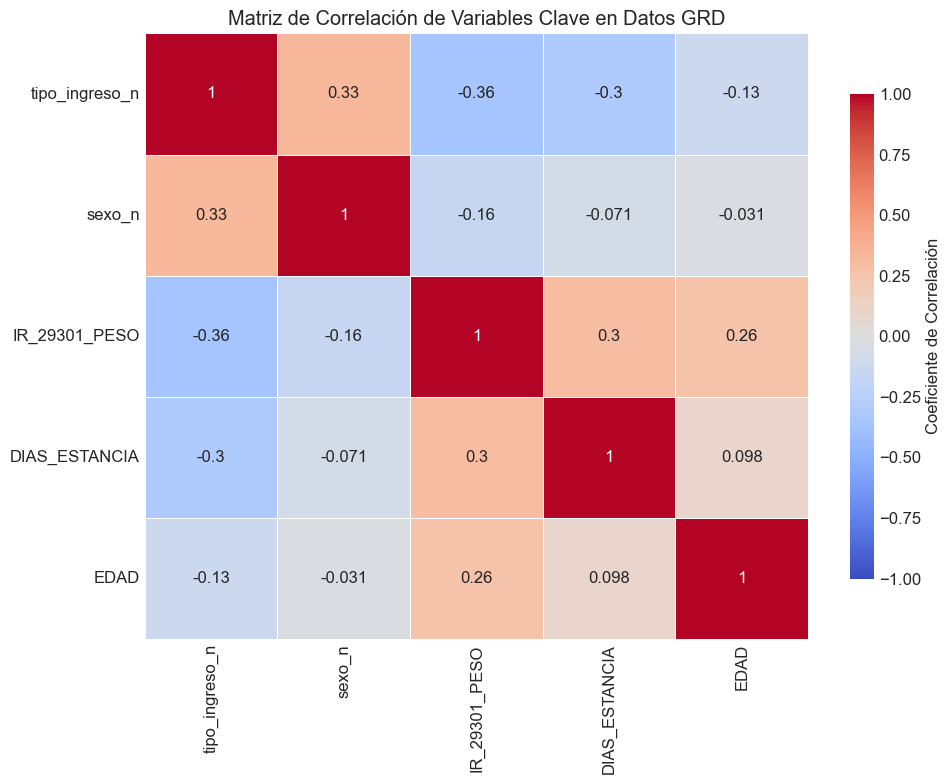

In [116]:
variables_numericas = ['tipo_ingreso_n', 'sexo_n', 'IR_29301_PESO', 'DIAS_ESTANCIA', 'EDAD']
corr_matrix = df2[variables_numericas].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, 
            linewidths=0.5, cbar_kws={"shrink": 0.8, "label": "Coeficiente de Correlación"})
plt.title('Matriz de Correlación de Variables Clave en Datos GRD')
plt.tight_layout()
plt.show()

## propensity escore matchin y AB testing

In [117]:
np.random.seed(42)
df2_muestra = df2.sample(10000)

In [118]:
hombre = df2_muestra[df2_muestra["sexo_n"] == 1 ]
mujer = df2_muestra[df2_muestra["sexo_n"] == 2 ]

In [119]:
def col_propensity_score(df, lista_confusoras, lista_char):
    """
    Devuelve el Dataframe entregado,con el propensity score
    -----------
    - df: Dataframe 
    - lista_confusoras: lista con variables confusoras
    - lista_char: lista con variables confusoras categoricas
    -----------
    Retorna:
    --------
    DataFrame con columna "propensity_score"
    -----------
    !!WARNING!!
    necesita la creacion de la columna "tratamiento", previo al ingreso
    """
    #confusoras
    X = df[lista_confusoras]
    # Convertir variables categóricas a variables dummy (one-hot encoding)
    X = pd.get_dummies(X, columns=lista_char, drop_first=True)
    y = df['tratamiento']

    # Eliminar filas con valores faltantes en X o y
    mask = X.notnull().all(axis=1) & y.notnull() #mascara q elimina los NULL
    X = X[mask]
    y = y[mask]

    # 3. Estandarizar variables numéricas para mejorar el ajuste del modelo
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # 4. Ajustar modelo de regresión logística para calcular propensity scores
    # El modelo predice la probabilidad de pertenecer al grupo "tratamiento" según las covariables
    modelo_ps = LogisticRegression(random_state=42)
    modelo_ps.fit(X_scaled, y)
    # Guardamos el propensity score en el DataFrame original
    df.loc[X.index, 'propensity_score'] = modelo_ps.predict_proba(X_scaled)[:, 1]

    display(X_scaled.shape)
    #regresa el Dataframe actualizado con la nueva columna
    return df


#se crea la columna tratamiento
#datos_servicios['tratamiento'] = (datos_servicios['SERVICIO_SALUD'] == 'METROPOLITANO NORTE').astype(int)

#se listan las variables confusoras y las que son categoricas.
#variables_confusoras=['EDAD', 'TIPO_INGRESO', 'IR_29301_PESO']
#variables_categoricas=['TIPO_INGRESO']
#col_propensity_score(datos_servicios,variables_confusoras,variables_categoricas)

In [120]:
df2_muestra['tratamiento'] = (df2_muestra['SEXO'] == 'HOMBRE').astype(int)
variables_confusoras=['EDAD', 'DIAS_ESTANCIA', 'TIPO_INGRESO', 'IR_29301_PESO']
variables_categoricas = ['TIPO_INGRESO']

In [121]:
df2_propensity = col_propensity_score(df2_muestra, variables_confusoras, variables_categoricas )
df2_propensity

(10000, 5)

,IR_29301_PESO,SEXO,EDAD,DIAS_ESTANCIA,TIPO_INGRESO,rango_etario,rango_de_estancia,tipo_ingreso_n,sexo_n,tratamiento,propensity_score
788218,0.5227,MUJER,60.0,1,PROGRAMADA,41-65,0-3,2,2,0,0.414228
885195,0.4252,MUJER,29.0,2,URGENCIA,19-40,0-3,1,2,0,0.495429
355311,1.7184,HOMBRE,56.0,6,URGENCIA,41-65,4-7,1,1,1,0.542979
644419,0.3109,MUJER,37.0,2,OBSTETRICA,19-40,0-3,3,2,0,0.002197
712452,0.4384,HOMBRE,79.0,0,PROGRAMADA,66+,0-3,2,1,1,0.390616
...,...,...,...,...,...,...,...,...,...,...,...
707368,1.4807,MUJER,71.0,4,PROGRAMADA,66+,4-7,2,2,0,0.457840
350773,0.5227,MUJER,38.0,1,OBSTETRICA,19-40,0-3,3,2,0,0.002285
69046,0.6800,MUJER,57.0,2,URGENCIA,41-65,0-3,1,2,0,0.481415
797501,0.8776,HOMBRE,8.0,0,PROGRAMADA,0-9,0-3,2,1,1,0.484348


In [122]:
# 5. Función para realizar matching
def match_propensity_scores(df, treatment_col='tratamiento', score_col='propensity_score', caliper=0.05):
    #funcion del profe para realizar Matching
    """
    Realiza matching por propensity score con un caliper dado.

    Parámetros:
    -----------
    df : DataFrame
        DataFrame con los datos
    treatment_col : str
        Nombre de la columna que indica el tratamiento (1) o control (0)
    score_col : str
        Nombre de la columna con propensity scores
    caliper : float
        Distancia máxima permitida para el matching

    Retorna:
    --------
    DataFrame con los pares matcheados
    -----------
    !!WARNING!!
    NO USAR SOBRE MUESTRAS DE 10MIL, PUES SE DEMORA DEMASIADO
    """
    # Separar tratamiento y control
    treated = df[df[treatment_col] == 1].copy() 
    control = df[df[treatment_col] == 0].copy() 

    # Almacenar índices de matches (usar índices originales)
    treated_indices = []
    control_indices = []

    # Para cada caso tratado, encontrar el control más cercano
    available_controls = control.copy()
    for treated_idx, treated_row in treated.iterrows():
        ps_treated = treated_row[score_col]
        available_controls['distance'] = abs(available_controls[score_col] - ps_treated)

        # Si hay controles disponibles
        if not available_controls.empty:
            best_match_idx = available_controls['distance'].idxmin()
            best_match_distance = available_controls.loc[best_match_idx, 'distance']

            # Verificar caliper
            if best_match_distance < caliper:
                treated_indices.append(treated_idx)
                control_indices.append(best_match_idx)

                # Eliminar el control usado para no reutilizarlo (para no tener un sesgo nuevo)
                available_controls = available_controls.drop(best_match_idx)

    # Crear DataFrame con los pares matcheados usando los índices originales
    matched_treated = treated.loc[treated_indices].reset_index(drop=True)
    matched_control = control.loc[control_indices].reset_index(drop=True)

    return matched_treated, matched_control

# 6. Realizar el matching
#treated_matched, control_matched = match_propensity_scores(datos_servicios)
#print(f"Número de pares matcheados: {len(treated_matched)}")

In [123]:
treated_matched, control_matched = match_propensity_scores(df2_propensity, caliper=0.2)

In [124]:
#Visualizar distribución de propensity scores antes y después del matching
def vizual_propensity_before_after(df, group_name, name_1, name_0, lista_num, lista_char,t_matched=treated_matched,c_matched=control_matched):
    """
    Comparacion Vizual del puntaje de propensidad antes y despues del matching
    -----------
    - df: Dataframe ya tratado
    - group_name: nombre del grupo (columna) analisis.
    - name_1: Str nombre columna tratamiento (la que tomamos como 1)
    - name_0: Str nombre de columna que tomamos como 0
    - lista_num: lista de variables numericas a revisar
    - lista_char: lista de variables categoricas a revisar
    -----------
    !!WARNING!!
    Se usa despues de match_propensity_scores(), pues depende de que sus returns esten inicializados
    """
    plt.figure(figsize=(12, 5))

    # Antes del matching
    plt.subplot(1, 2, 1)
    sns.histplot(df[df['tratamiento']==1]['propensity_score'],
                color='blue', alpha=0.5, label=name_1, kde=True)
    sns.histplot(df[df['tratamiento']==0]['propensity_score'],
                color='green', alpha=0.5, label=name_0, kde=True)
    plt.title('Propensity Scores - Antes del Matching')
    plt.xlabel('Propensity Score')
    plt.legend()

    # Después del matching
    plt.subplot(1, 2, 2)
    sns.histplot(t_matched['propensity_score'], color='blue', alpha=0.5,
                label=name_1, kde=True)
    sns.histplot(c_matched['propensity_score'], color='green', alpha=0.5,
                label=name_0, kde=True)
    plt.title('Propensity Scores - Después del Matching')
    plt.xlabel('Propensity Score')
    plt.legend()

    plt.tight_layout()
    plt.show()

    # Balance numérico antes del matching
    balance_before_num = df.groupby(group_name)[lista_num].mean()

    # Balance numérico después del matching
    dicc ={}
    for i in lista_num:
        dicc[i] = [t_matched[i].mean(), c_matched[i].mean()]

    balance_after_num = pd.DataFrame(dicc, index=[name_1, name_0])

    print("\nBalance de covariables numéricas antes del matching:")
    print(balance_before_num)
    print("\nBalance de covariables numéricas después del matching:")
    print(balance_after_num)


    #Comparacion de Categoricas
    for i in range(len(lista_char)): 
        # Balance categórico antes del matching
        balance_before_cat = pd.crosstab(df[group_name], df[lista_char[i]], normalize='index')
        # Balance categórico después del matching

        balance_after_cat = pd.DataFrame({
            name_1: t_matched[lista_char[i]].value_counts(normalize=True),
            name_0: c_matched[lista_char[i]].value_counts(normalize=True)
        }).fillna(0).T
        
        print("==============================")
        print("\nDistribución de TIPO_INGRESO antes del matching:")
        print(balance_before_cat)
        print("\nDistribución de TIPO_INGRESO después del matching:")
        print(balance_after_cat)

#ejemplo implementacion
#variables_numericas = ['EDAD','severidad']
#variables_categoricas = ['TIPO_INGRESO']
#vizual_propensity_before_after(datos_actividad,"SEXO","HOMBRE","MUJER",variables_numericas, variables_categoricas)

In [125]:
variables_numericas =['EDAD', 'DIAS_ESTANCIA', 'IR_29301_PESO']

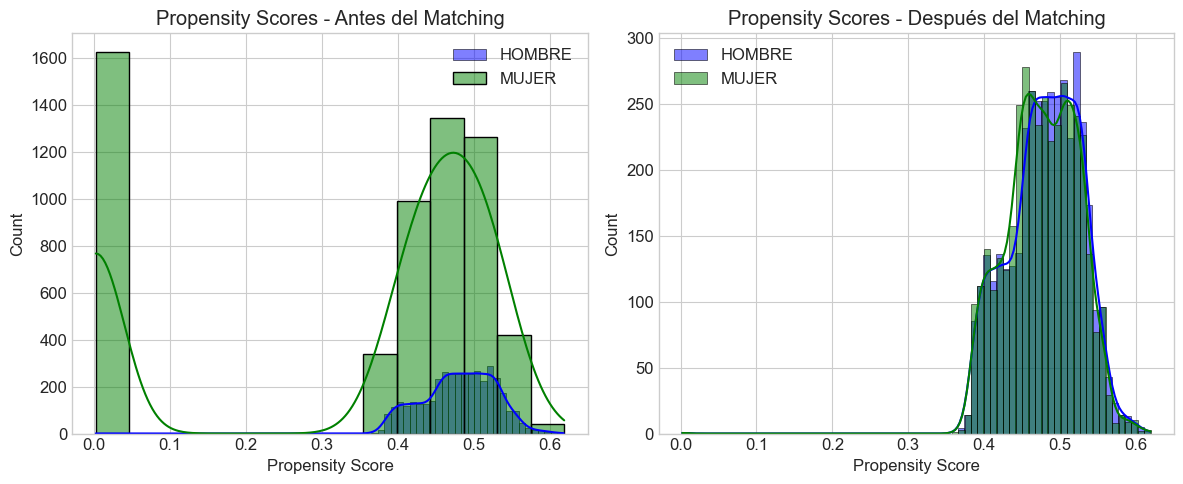


Balance de covariables numéricas antes del matching:
             EDAD  DIAS_ESTANCIA  IR_29301_PESO
SEXO                                           
HOMBRE  45.882957        5.06416       0.805535
MUJER   43.586689        4.14010       0.685327

Balance de covariables numéricas después del matching:
             EDAD  DIAS_ESTANCIA  IR_29301_PESO
HOMBRE  45.882957       5.064160       0.805535
MUJER   47.549123       4.847118       0.796197

Distribución de TIPO_INGRESO antes del matching:
TIPO_INGRESO  OBSTETRICA  PROGRAMADA  URGENCIA
SEXO                                          
HOMBRE          0.000251    0.389975  0.609774
MUJER           0.269884    0.336938  0.393178

Distribución de TIPO_INGRESO después del matching:
TIPO_INGRESO  URGENCIA  PROGRAMADA  OBSTETRICA
HOMBRE        0.609774    0.389975    0.000251
MUJER         0.590977    0.408772    0.000251


In [126]:
vizual_propensity_before_after(df2_propensity, "SEXO", "HOMBRE", "MUJER", variables_numericas, variables_categoricas)

In [127]:
    # Ahora podemos realizar la prueba t con muestras balanceadas
    # Se compara la estancia hospitalaria (DIAS_ESTANCIA) entre los dos servicios de salud
    # usando solo los pacientes matcheados por propensity score (grupos comparables).
def test_t_AB_comparasion(df,columna_main, columna_analisis,name_1,name_0, title_var_analisis):
    """
    Comparacion de resultados en AB del test T (Student).
    Se compara entre pre y post MATCHing
    -----------
    - df: Dataframe ya tratado
    - columna_main: columna principal del analisis, desde donde se dividen los grupos (ej: SERVICIO_SALUD)
    - columna_analisis: columna que se busca analizaar desde los rupos formados de la columna_main (ej: DIAS_ESTANCIA)
    - name_1: nombre columna tratamiento (la que tomamos como 1)
    - name_0: nombre de columna que tomamos como 0
    - title_var_analisis: el ylabel(). Es el titulo que se le da a las variables de la columna_analisis
    -----------
    !!WARNING!!
    -Se requiere sacar el p_value original del conjunto Pre-MATCH
    -Se usa despues de match_propensity_scores(), pues depende de que sus returns esten inicializados
    """
#dias estancia  = columna_analisis
#SERVICIO_SALUD = columna_main
    t_stat_matched, p_value_matched = stats.ttest_ind(
        treated_matched[columna_analisis],
        control_matched[columna_analisis],
        equal_var=False
    )

    # Insights y resumen de la comparación
    print("=== INSIGHTS DE LA COMPARACIÓN ===")
    print(f"Antes del matching: p-valor = {p_value:.3e}")
    print(f"Después del matching: p-valor = {p_value_matched:.3e}")
    print(f"Media estancia (grupo 1, matched): {treated_matched[columna_analisis].mean():.2f} días")
    print(f"Media estancia (grupo 0, matched): {control_matched[columna_analisis].mean():.2f} días")
    diff_matched = treated_matched[columna_analisis].mean() - control_matched[columna_analisis].mean()
    print(f"Diferencia de medias tras matching: {diff_matched:.2f} días")

    if p_value_matched < 0.05:
        #...en la estancia hospitalaria entre los servicios
        print("→ Hay una diferencia estadísticamente significativa tras el ajuste por propensity score.")
    else:
        print("→ No hay evidencia suficiente de diferencia significativa tras el ajuste por propensity score.")

    print("\nNota: El matching permite comparar grupos con características similares, reduciendo el sesgo de selección.")

    diff =  df[df[columna_main] == name_1][columna_analisis].mean() - df[df[columna_main] == name_0][columna_analisis].mean()
    se = np.sqrt(df[df[columna_main] == name_1][columna_analisis].var()/len(df[df[columna_main] == name_1][columna_analisis]) +
                df[df[columna_main] == name_0][columna_analisis].var()/len(df[df[columna_main] == name_0][columna_analisis]))
    ci_lower = diff - 1.96 * se
    ci_upper = diff + 1.96 * se

    print("\n=== COMPARACIÓN RESULTADOS DEL A/B TEST ===")
    print(f"\n--- RESULTADOS DEL A/B TEST (Not MATCHED)---")
    print(f"Diferencia en {title_var_analisis} ({name_1} - {name_0}): {diff:.2f} días")
    print(f"Intervalo de confianza 95%: [{ci_lower:.2f}, {ci_upper:.2f}]")
    print(f"Valor p: {p_value:.4f}")

    if p_value < 0.05:
        print(f"Conclusión: Hay una diferencia estadísticamente significativa en las medias de {title_var_analisis}")
    else:
        print(f"Conclusión: No hay evidencia suficiente para afirmar una diferencia en {title_var_analisis}")

    diff = treated_matched[columna_analisis].mean() - control_matched[columna_analisis].mean()
    se = np.sqrt(treated_matched[columna_analisis].var()/len(treated_matched) +
                control_matched[columna_analisis].var()/len(control_matched))
    ci_lower = diff - 1.96 * se
    ci_upper = diff + 1.96 * se

    print(f"\n--- RESULTADOS DEL A/B TEST (MATCHED)---")
    print(f"Diferencia en {title_var_analisis} ({name_1} - {name_0}): {diff:.2f} días")
    print(f"Intervalo de confianza 95%: [{ci_lower:.2f}, {ci_upper:.2f}]")
    print(f"Valor p: {p_value_matched:.4f}")
    
    if p_value_matched < 0.05:
        print(f"Conclusión: Hay una diferencia estadísticamente significativa en las medias de {title_var_analisis}")
    else:
        print(f"Conclusión: No hay evidencia suficiente para afirmar una diferencia en {title_var_analisis}")

    # Tamaño del efecto (d de Cohen)
    pooled_std = np.sqrt((treated_matched[columna_analisis].var() * (len(treated_matched) - 1) +
                        control_matched[columna_analisis].var() * (len(control_matched) - 1)) /
                        (len(treated_matched) + len(control_matched) - 2))
    effect_size = diff / pooled_std
    print(f"\nTamaño del efecto (d de Cohen): {effect_size:.2f}")

    # Interpretar el tamaño del efecto
    if abs(effect_size) < 0.2:
        effect_interp = "pequeño"
    elif abs(effect_size) < 0.5:
        effect_interp = "medio"
    else:
        effect_interp = "grande"

    print(f"Interpretación: El efecto es {effect_interp}.")


    return t_stat_matched, p_value_matched

#ejemplo de llamado
# Comparación directa (sin ajuste) - INCORRECTA
#norte_estancia = datos_servicios[datos_servicios['SERVICIO_SALUD'] == 'METROPOLITANO NORTE']['DIAS_ESTANCIA']
#sur_estancia = datos_servicios[datos_servicios['SERVICIO_SALUD'] == 'METROPOLITANO SUR']['DIAS_ESTANCIA']

# Realizar prueba t (comparación ingenua)
#t_stat, p_value = stats.ttest_ind(norte_estancia, sur_estancia, equal_var=False)
#t_stat_matched, p_value_matched=test_t_AB_comparasion(datos_actividad,"SEXO","IR_29301_PESO","HOMBRE","MUJER","Peso GRD")

In [128]:
#ejemplo de llamado
# Comparación directa (sin ajuste) - INCORRECTA
norte_estancia = df2_muestra[df2_muestra['SEXO'] == 'HOMBRE']['IR_29301_PESO']
sur_estancia = df2_muestra[df2_muestra['SEXO'] == 'MUJER']['IR_29301_PESO']

# Realizar prueba t (comparación ingenua)
t_stat, p_value = stats.ttest_ind(norte_estancia, sur_estancia, equal_var=False)

t_stat_matched, p_value_matched = test_t_AB_comparasion(df2_propensity, "SEXO", "IR_29301_PESO", "HOMBRE", "MUJER", "Peso GRD")

=== INSIGHTS DE LA COMPARACIÓN ===
Antes del matching: p-valor = 6.945e-57
Después del matching: p-valor = 2.602e-01
Media estancia (grupo 1, matched): 0.81 días
Media estancia (grupo 0, matched): 0.80 días
Diferencia de medias tras matching: 0.01 días
→ No hay evidencia suficiente de diferencia significativa tras el ajuste por propensity score.

Nota: El matching permite comparar grupos con características similares, reduciendo el sesgo de selección.

=== COMPARACIÓN RESULTADOS DEL A/B TEST ===

--- RESULTADOS DEL A/B TEST (Not MATCHED)---
Diferencia en Peso GRD (HOMBRE - MUJER): 0.12 días
Intervalo de confianza 95%: [0.11, 0.13]
Valor p: 0.0000
Conclusión: Hay una diferencia estadísticamente significativa en las medias de Peso GRD

--- RESULTADOS DEL A/B TEST (MATCHED)---
Diferencia en Peso GRD (HOMBRE - MUJER): 0.01 días
Intervalo de confianza 95%: [-0.01, 0.03]
Valor p: 0.2602
Conclusión: No hay evidencia suficiente para afirmar una diferencia en Peso GRD

Tamaño del efecto (d de C

### Modelo de Regression Linear


In [135]:
#trabajamos con el dataset sin outliers
#nos quedamos con solo las columnas relevantes
df_regression= df2[["IR_29301_PESO","EDAD","DIAS_ESTANCIA","sexo_n","tipo_ingreso_n"]].copy()

#shuffle de los datos
df_regression=df_regression.sample(frac=1, random_state=42).reset_index(drop=True)
#df_regression.isna().value_counts()
#df_regression.dropna(inplace=True)
df_regression

,IR_29301_PESO,EDAD,DIAS_ESTANCIA,sexo_n,tipo_ingreso_n
0,0.5227,60.0,1,2,2
1,0.4252,29.0,2,2,1
2,1.7184,56.0,6,1,1
3,0.3109,37.0,2,2,3
4,0.4384,79.0,0,1,2
...,...,...,...,...,...
957166,1.0746,61.0,2,2,1
957167,0.6915,42.0,1,2,2
957168,0.4186,6.0,0,2,2
957169,0.4193,39.0,17,2,1


Separamos los datos

In [130]:
#Y = PESO
#x = el resto de columnas, expecto PESO
y_price = df_regression['IR_29301_PESO']
X = df_regression.drop(columns=['IR_29301_PESO'])

In [131]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
from sklearn.preprocessing import StandardScaler


#Aqui asignamos los % requeridos del ejercicio
entrenamiento_x, validacion_x, entrenamiento_y, validacion_y = train_test_split(X,y_price, test_size=0.2, random_state=42) #80% entrenamiento y 20% resto
validacion_x, testeo_x, validacion_y, testeo_y = train_test_split(validacion_x,validacion_y, test_size=0.5, random_state=42) #se divide el 20% restante entre validacion y testeo (10% cada uno)

Normalisacion de los datos para un mejor modelo

In [132]:
def normalize_df(df, scaler): #funcion que devuelve un Dataframe, normalizado
    #usada para tener instantaneamente el mismo DF entregado, pero normalizado (porque normalmene entrega un array).
    return pd.DataFrame(scaler.fit_transform(df), columns=df.columns, index=df.index)

Dnormal = StandardScaler();
Dnormal.fit(entrenamiento_x); #entrenamiento
#Normalizar conjunto de entrenamiento
entrenamiento_N= normalize_df(entrenamiento_x,Dnormal)
#Normalizar conjunto de validacion
val_N= normalize_df(validacion_x,Dnormal)
#normalizar conjunto de prueba
testeo_N=normalize_df(testeo_x, Dnormal)
entrenamiento_N

,EDAD,DIAS_ESTANCIA,sexo_n,tipo_ingreso_n
681579,1.507570,0.577803,-1.232105,-0.930725
903892,0.412167,0.421228,0.811619,-0.930725
518509,0.138316,-0.205072,-1.232105,-0.930725
930663,1.507570,-0.361647,0.811619,-0.930725
314003,1.351084,-0.361647,-1.232105,0.433267
...,...,...,...,...
259178,-0.292020,3.865876,0.811619,1.797259
365838,-0.604992,-0.048497,-1.232105,-0.930725
131932,0.998990,-0.361647,0.811619,0.433267
671155,0.725139,6.214500,0.811619,0.433267


### Levantamiento del Modelo

Usamos el resultado MAE para ver el mejor ajuste al modelo

In [133]:
def mejor_MAE(matriz_train, matriz_validacion,y_train, y_validacion, variables_seleccionadas): 
    """
        matriz_train: DataFrame de entrenamiento (X)
        matriz_validacion: DataFrame de validacion (val_N)
        y_train: columna de entrenamiento Y (por ejemplo: 'price')
        y_validacion: columna de validacion Y 
        variables_seleccionadas: lista de variables a usar para el modelo (selected_vars),
                                sacadas de verificaciones anteriores (a traves del MAE)
    """
    
    #se definen Diccionarios para despues mostrar un Dataframe
    dicc_MAE ={}
    dicc_r2 = {}
    dicc_MSE = {}
    dicc_MAPE = {}
    dicc_B ={}

    #se definen las variables a usar (el nombre de las columnas)
    variables = matriz_train.columns #variables a medir (MAE)
    variables= variables.drop(variables_seleccionadas) #se eliminan las variables que ya se han usado

    #se itera por cada columna
    for i in range(len(variables)):

        variables_columnas = variables_seleccionadas +[variables[i]] #se agrega la variable a la lista de variables seleccionadas
    
        Xi = matriz_train[variables_columnas]   #columnas a usar
        Yi = y_train #y = price

        modelo = LinearRegression()
        modelo.fit(Xi,Yi)

        y_real = y_validacion 
        y_predict = modelo.predict(matriz_validacion[variables_columnas])
        
        #Se guardan los resultados
        dicc_MAE[variables[i]] = mean_absolute_error(y_real, y_predict)
        dicc_r2[variables[i]] = r2_score(y_real, y_predict)
        dicc_MSE[variables[i]] = mean_squared_error(y_real, y_predict)
        dicc_MAPE[variables[i]] = mean_absolute_percentage_error(y_real, y_predict)

    #se crea el DataFrame con los resultados
    df_stats = pd.DataFrame({
        'MAE': dicc_MAE.values(),
        'R2': dicc_r2.values(),
        'MSE': dicc_MSE.values(),
        'MAPE': dicc_MAPE.values()
        
    }, index=variables)

    

    print("\nEl mejor modelo es el de la variable:", min(dicc_MAE, key=dicc_MAE.get), ", con un MAE de:", min(dicc_MAE.values()))
    
    #Si desea ver el dataframe de cada iteracion, descomente la siguiente linea:
    #display(df_stats.sort_values(by='MAE', ascending=True)) #se ordena el DataFrame por MAE 
    
    return df_stats.sort_values(by='MAE', ascending=True) #se devuelve el mejor MAE (el menor)

In [139]:
def modelo_optimo(matriz_train, matriz_validacion,y_train, y_validacion): #devuelve un Dataframe con las variables que resultan en el modelo optimo
    """
        matriz_train: DataFrame de entrenamiento (X)
        matriz_validacion: DataFrame de validacion (val_N)
        y_train: columna de entrenamiento Y (por ejemplo: 'price')
        y_validacion: columna de validacion Y 
    """
    checker = {} #para revisar el MAE con el anterior
    selected_vars = []

    x= matriz_train
    y= y_train

    for i in range(len(x.columns)):

        fila_MAE = mejor_MAE(x,matriz_validacion, y, y_validacion, selected_vars) #se calcula por cada variable
        insertar = fila_MAE.iloc[0] #se selecciona la fila con el menor MAE (la primera)

        checker[insertar.name] = insertar #se agrega la variable a la lista de variables seleccionadas

        #revision para continuar el modelo
        if len(selected_vars) > 1:  #solo si ya hay mas de 1 variable

            ultimo_MAE = checker[list(checker.keys())[-1]]  #ultima Serie agegada
            penultimo_MAE = checker[list(checker.keys())[-2]] #penultima Serie
            #print("Ultimo MAE:", checker[ultimo])

            if ultimo_MAE['MAE'] > penultimo_MAE['MAE']: ##si el MAE de la variable es mayor al anterior, se detiene el ciclo
                print("-------------------------------------------------------------------------------------------------")
                print("El modelo ha dejado de mejorar, se detiene con", len(selected_vars), "variables seleccionadas")
                print("La ultima variable seleccionada fue:", penultimo_MAE.name
                    , "con un MAE de", 
                    penultimo_MAE['MAE'])
                print("La variable que empeoro el modelo fue:", 
                    ultimo_MAE.name
                    , "con un MAE de", ultimo_MAE['MAE'])
                print("-------------------------------------------------------------------------------------------------")  
                checker.popitem() #se elimina la ultima variable revisada (la que empeoro el modelo)              
                return pd.DataFrame.from_dict(checker, orient='index') #se transforma en un Df para graficar
        
        selected_vars.append(insertar.name) #se agrega la variable a la lista de variables seleccionadas
        #x_test = x_test.drop(columns=[selected_vars[-1]])
        

In [140]:
selected_vars = []
checker = modelo_optimo(entrenamiento_N,val_N, entrenamiento_y, validacion_y) #se ejecuta la funcion para obtener el modelo optimo
#pd.DataFrame.from_dict(checker, orient='index') #se transforma en un Df para graficar
print("Las metricas finales a usar son:")
checker 


El mejor modelo es el de la variable: tipo_ingreso_n , con un MAE de: 0.2672771603633609

El mejor modelo es el de la variable: DIAS_ESTANCIA , con un MAE de: 0.2591685950002754

El mejor modelo es el de la variable: EDAD , con un MAE de: 0.25476889713136713

El mejor modelo es el de la variable: sexo_n , con un MAE de: 0.2548685153406505
-------------------------------------------------------------------------------------------------
El modelo ha dejado de mejorar, se detiene con 3 variables seleccionadas
La ultima variable seleccionada fue: EDAD con un MAE de 0.25476889713136713
La variable que empeoro el modelo fue: sexo_n con un MAE de 0.2548685153406505
-------------------------------------------------------------------------------------------------
Las metricas finales a usar son:


,MAE,R2,MSE,MAPE
tipo_ingreso_n,0.267277,0.124811,0.118532,6.022564e+12
DIAS_ESTANCIA,0.259169,0.168072,0.112673,5.690906e+12
EDAD,0.254769,0.207576,0.107322,6.190328e+12


De las 4 columnas a usar para ajustar el modelo, solo 1 quedo fuera (pues empeoraba los resultados). Aunque el 25% de las columnas siendo ignoradas del modelo, esto tiene que ver con la cantidad de columnas usadas, lo cual afecta en el entrenamiento correcto del modelo. Una mayor cantidad de variables para el modelo, podria resultar en una mejor aproximación a la realidad.

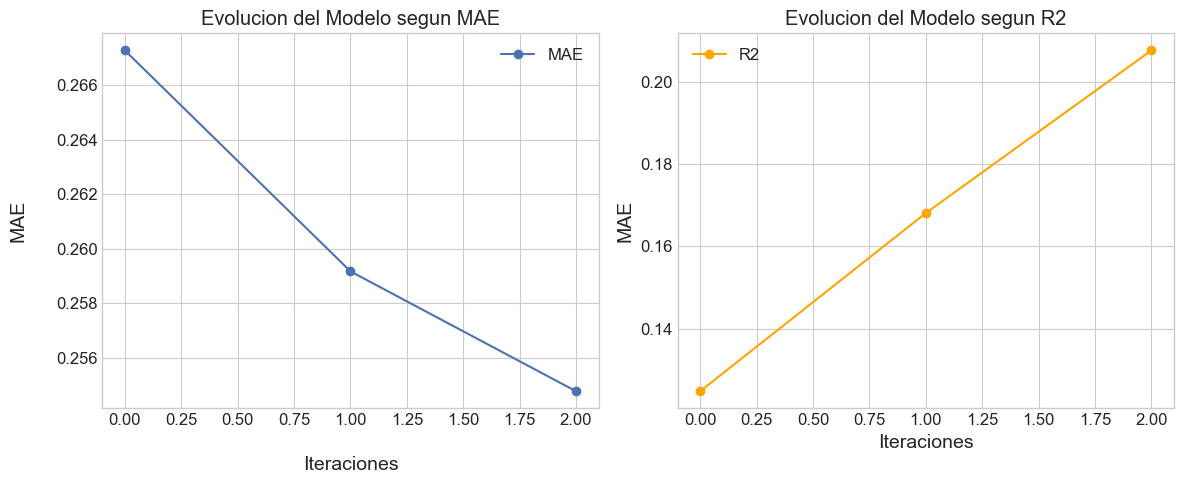

In [147]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(checker['MAE'].reset_index(drop=True), marker='o', label='MAE')
plt.xlabel('Iteraciones', fontsize=14, labelpad=20)
plt.ylabel('MAE', fontsize=14, labelpad=20)
plt.title("Evolucion del Modelo segun MAE")
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(checker['R2'].reset_index(drop=True), marker='o', label='R2', color='orange')
plt.xlabel('Iteraciones', fontsize=14)
plt.ylabel('MAE', fontsize=14)
plt.title("Evolucion del Modelo segun R2")
plt.legend()

plt.tight_layout()
plt.show()